In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:

def fuse_images(thermal_img, rgb_img, alpha=0.5):
    if thermal_img.shape != rgb_img.shape:
        rgb_img = cv2.resize(rgb_img, (thermal_img.shape[1], thermal_img.shape[0]))
    if len(thermal_img.shape) == 2:  # Convertir térmica a 3 canales si es en escala de grises
        thermal_img = cv2.cvtColor(thermal_img, cv2.COLOR_GRAY2BGR)
    fused_img = cv2.addWeighted(thermal_img, alpha, rgb_img, 1 - alpha, 0)
    return fused_img

def visualize_image_fusion(thermal_img, rgb_img, fused_img, alpha=0.5):
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(thermal_img)
    plt.title('Thermal Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(rgb_img)
    plt.title('RGB Image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(fused_img)
    plt.title(f'Fused Image (alpha={alpha})')
    plt.axis('off')
    plt.show()

def process_images(folder):
    for file in os.listdir(folder):
        if file.endswith('_thermal.jpg'):
            thermal_path = os.path.join(folder, file)
            rgb_path = os.path.join(folder, file.replace('_thermal', '_rgb'))
            if os.path.exists(rgb_path):
                thermal_img = cv2.imread(thermal_path, cv2.IMREAD_GRAYSCALE)
                rgb_img = cv2.imread(rgb_path)
                fused_img = fuse_images(thermal_img, rgb_img)
                visualize_image_fusion(thermal_img, rgb_img, fused_img)

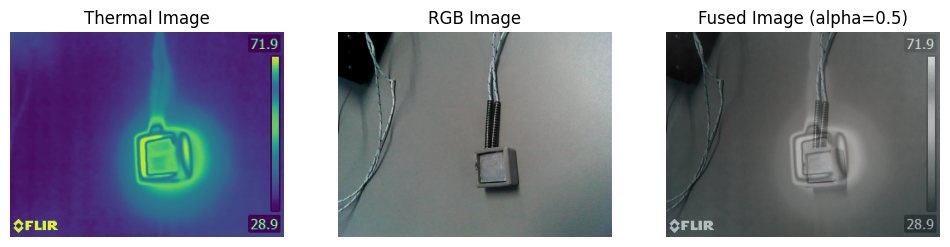

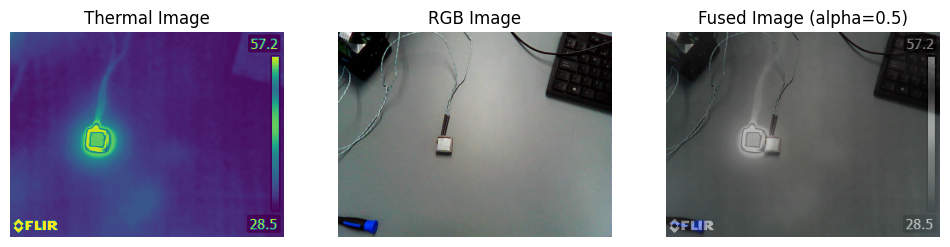

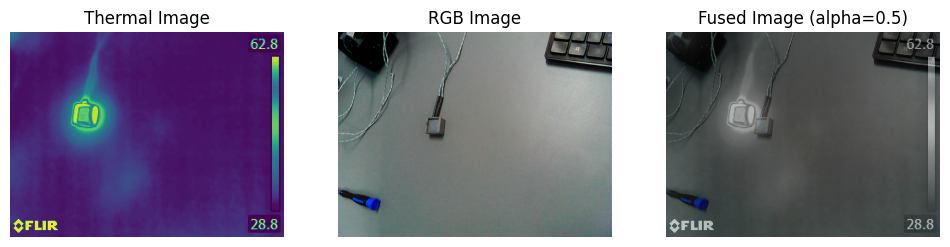

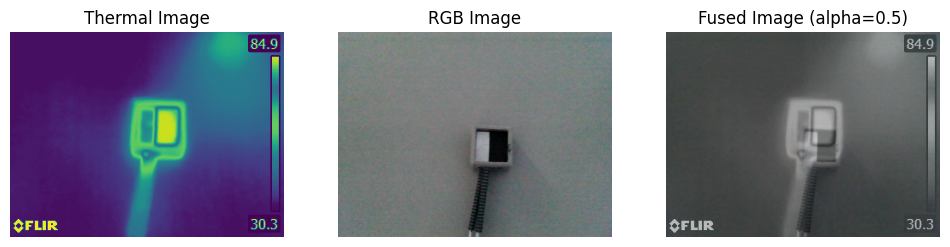

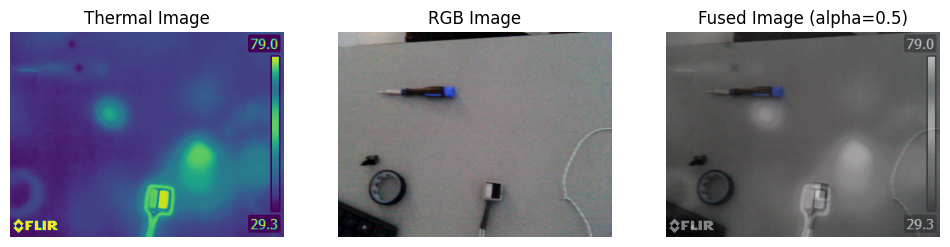

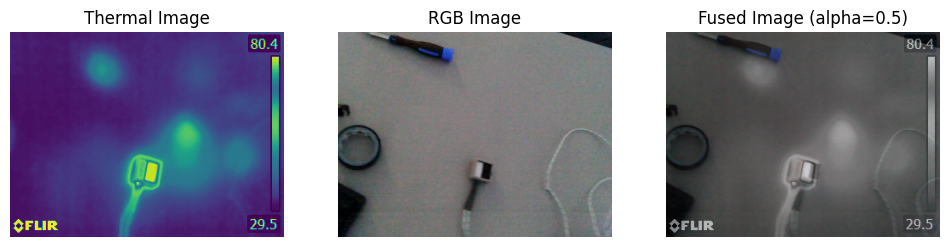

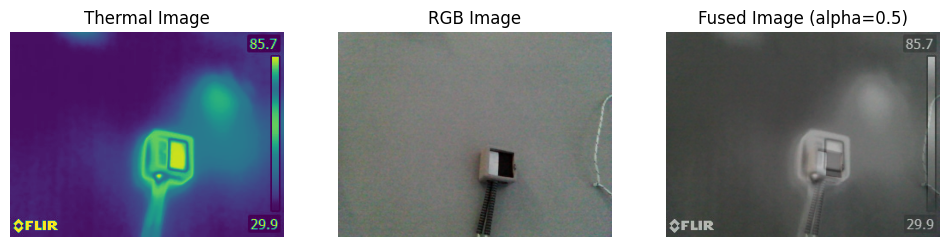

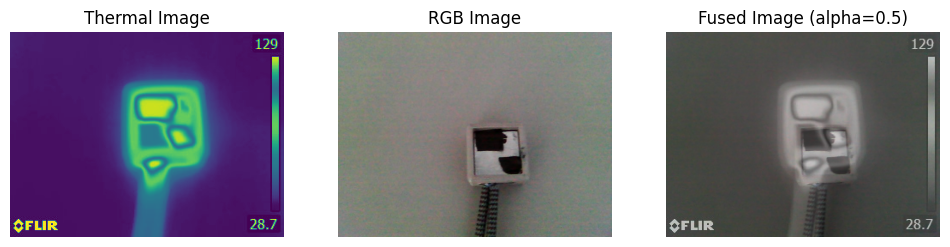

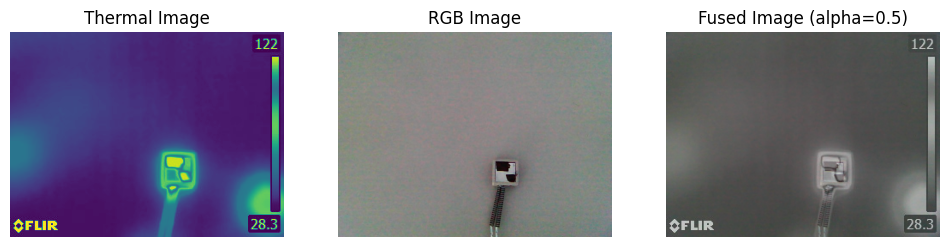

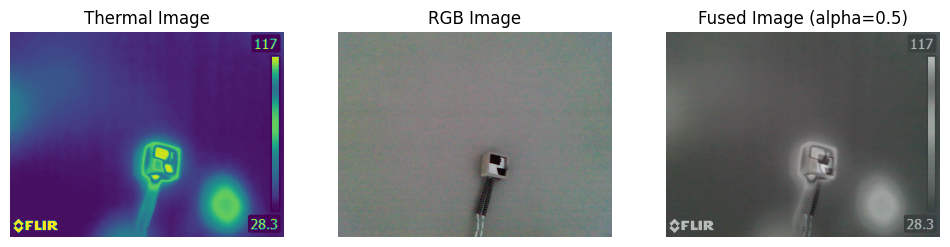

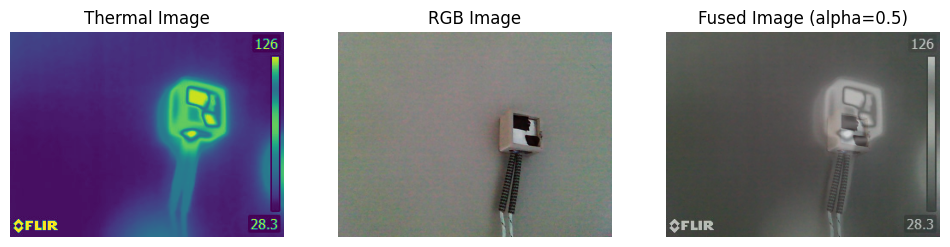

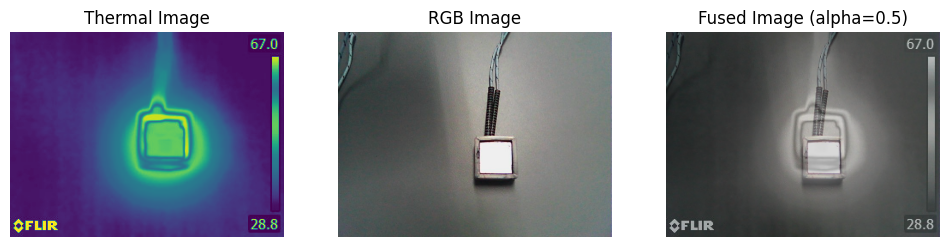

In [10]:
if __name__ == '__main__':
    folder = '/content/drive/MyDrive/Programacion Cientifica/Database'
    process_images(folder)